## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Peter O'Mahony

Student ID: 8361967

<hr style="border:2px solid gray"> </hr>

## The Task Statement
_The goal of this task is to create your own implementation of linear regression using your own functions to implement the required matrix manipulations._
_Inspect the reference implementation and create functions for all the matrix manipulations required to implement the linear regression algorithm._

_(Objective 1) Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector. Call this function 'fit'._

_(Objective 2) Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function 'predict'._

_(Objective 3) Finally, create a function that returns the weights found by the fit method. Call this function 'get_params'._

_Please note:_

_The function to calculate the inverse of a matrix need only be applicable to 2x2 matrices. All other functions should be able to handle matrices of arbitrary sizes._
_Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors._
_Add appropriate comments (doc strings) to the functions you have created._
_At this stage you should not create a class to encapsulate your code. Please add this element, if time permits, as part of your reflection._

## Initial Thoughts
This challenge is about creating functions that operate on matrices. Later those functions will need to become methods in a class.

Somewhere in the resources implies that to estimate the least squares we use a formula like:
$$ (X^T \cdot X)^{-1} \cdot X^T \cdot y$$
and I found that in Pep's Lessons video.  It's not clear to me how that formula is derived but I can precipiate from it that there are a few matrix manipulations/functions needed to use the formula:
1. Transpose
2. Dot Product
3. Inverse

and it appears that that is the scope of Part 1 of this E-tivity.  I'm fascinated that there is no sign of a square root or Pythagorus in this and yet we are going to evaluate distances from a line.  A shake of magic no doubt.

## Approach
I am going to write the functions noted above and then define a collection of tests that uses both them and the numpy versions and compares the results.

The Dot product looks like the most complex so I will start with that.  I wrote out a pair of generic matrices on paper to help me consider the coordinates of each element in a matrix and determine how it will be used:

$$
\left [
\begin{matrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{matrix}
\right ]
.
\left [
\begin{matrix}
B_{11} & B_{12} & B_{13} \\
B_{21} & B_{22} & B_{23} 
\end{matrix}
\right ]
=
\left [
\begin{matrix}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} 
\end{matrix}
\right ]
$$

where, for example, 
$ C_{11} = A_{11}B_{11}+A_{12}B_{21} $ and $ C_{12} = A_{11}B_{12}+A_{12}B_{22} $ etc

Some validation will be necessary.  For Dot Product of A.B, the number of columns of A must match the number of rows of B. The resulting matrix will have dimensions of the number of rows of A times the number of columns of B.

The arrangement of for loops to effect this function is daunting so I thought about ways to help myself track the output.  When considering $ C_{11} $ in this example, I noticed the pattern where the value is the sum of n terms and that n is equal to the number of columns in A (or rows in B). This suggested to me that I could take an iterative approach to calculating the value of each element in the resulting matrix and that I could use a for loop to determine the value of each term and add it to whatever the value of that element was.

I knew it would take me more time to work out sample calculations for a number of test matrices while developing the code so I came up with an idea to skip the calculations but still prove the result. I used strings and concatenation to produce the output in a similar way to that shown above and included the positions/coordinates of each element in the result.

## Calculating the Inverse of a matrix
I found this formula here https://www.mathsisfun.com/algebra/matrix-inverse.html:
$$
\left [
\begin{matrix}
a & b \\
c & d
\end{matrix}
\right ]
^{-1}
=
\frac {1}{ad-bc}
\left [
\begin{matrix}
d & -b \\
-c & a
\end{matrix}
\right ]
$$

and it says that $ {ad-bc} $ is the determinant of the matrix and that seems important so I'm going to give it its own function because it'll probably be handy in the future.

Also, it becomes clear at this point that I will need to multiply a matrix by a scalar so I will need a function for that.

## Testing
I will compare each of my functions with the numpy versions over a range of matrices.

## Manual Calculation

In addition to automated testing, I manually calculated some sample data as follows:
I invented a very simple scenario of book sales to customers that are in a loyalty scheme.  We want to be able to predict how much a customer will spend during a promotion event based on their past behaviour.  Our historical data tell us how many points they had at the start of the last event and how much they spent at it:

|points|spent|
|------|------|
|874     |14.50     |
|982     |15.25     |
|1100    | 17.00    |
| 1298   | 16.75 |


Let's create the matrices X and y and then apply our formula $$ (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

$$
X = 
\left [
\begin{matrix}
1 & 874 \\
1 & 982 \\
1 & 1100 \\
1 & 1298
\end{matrix}
\right ]
y =
\left [
\begin{matrix}
14.50 \\ 
15.25  \\
 17.00    \\
 16.75  
\end{matrix}
\right ]
$$

$$
X^T = 
\left [
\begin{matrix}
1 & 1 & 1 & 1 \\
874 & 982 & 1100 & 1298
\end{matrix}
\right ]
$$

$$
X^T.X = 
\left [
\begin{matrix}
4 & 4254 \\
4254 & 4623004
\end{matrix}
\right ]
$$

$$
(X^T \cdot X)^{-1} =
\left [
\begin{matrix}
11.69 & -0.01 \\
-0.01 & 0
\end{matrix}
\right ]
$$

$$
(X^T \cdot X)^{-1} \cdot X^T  =
\left [
\begin{matrix}
2.29 & 1.13 & -0.14 & -2.27 \\
0 & 0 & 0 & 0
\end{matrix}
\right ]
$$

$$
(X^T \cdot X)^{-1} \cdot X^T \cdot y =
\left [
\begin{matrix}
9.876 \\
0.0056
\end{matrix}
\right ]
$$

This gives us our weights (or the slope m and constant c of y = mx + c) so that we can predict how much a customer will spend given their loyalty points.

If a customer has 1000 points then we predict they will spend mx + c euro or
$(0.056)1000 + 9.8876 = 15.48 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

## My Implementation

In [4]:
def dim(matrix: list) -> list:
    """
    This returns a list of dimensions of the matrix.
    It is the first recursive function I have used in python and am including it for future reference.
    It comes from https://stackoverflow.com/questions/17531796/find-the-dimensions-of-a-multidimensional-python-array
    """
    if not type(matrix) == list:
        return []
    return [len(matrix)] + dim(matrix[0])

### Error checking functions
These functions raise an exception and halt execution unless the specified requirement is met.  I took this approach to increase the legibility of the individual matrix operations.

In [5]:
def require_to_be_square(matrix: list[list[float]]) -> None:
    """
    Raises an error if the matrix is not square.
    """
    if (len(matrix) != len(matrix[0])):
        raise ValueError(f"This matrix must be square to get its inverse but the dimensions are {dim(matrix)}")

def require_to_be_2x2(matrix: list[list[float]]) -> None:
    """
    Raises an error if the matrix is not 2x2.
    """
    if (len(matrix) != 2):
        raise ValueError(f"This matrix must have 2x2 dimensions")

def require_at_least_two_dimensions(matrix: list[list[float]]) -> None:
    """
    Raises an error if the matrix has fewer than two dimensions.
    """
    # get the dimensions of the matrix
    dim_matrix = dim(matrix)

    if (len(dim_matrix) < 2): # Verify that we have at least two dimensions
        raise ValueError(f"The matrix must have at least two dimensions but it has {len(dim_matrix)} dimensions")

def require_colsA_equal_rowsB(A: list[list[float]], B: list[list[float]]) -> None:
    """
    Raises an error if the number of columns in A does not match the number of rows in B.
    """
    if (len(A[0]) != len(B)):
        raise ValueError(f"The number of columns in A ({len(A[0])}) must match the number of rows in B ({len(B)})"
                         f"\nA={A}, B={B}")

def require_same_dimensions(A: list[list[float]], B: list[list[float]]) -> None:
    """
    Raises an error if the dimensions of A do not match those of B.
    """
    dim_A, dim_B = dim(A), dim(B)
    if (dim_A != dim_B):
        raise ValueError(f'The matrices must have the same dimensions (A has {dim_A} and B has {dim_B})')


In [6]:
def transpose_matrix(matrix: list[list[float]]) -> list[list[float]]:
    """
    This transposes the matrix by switching the rows and columns and returns a new matrix.
    """
    # It uses the python List Comprehension feature to navigate to each element in the matrix
    return [[matrix[row][col] for row in range(0,len(matrix))] for col in range(0,len(matrix[0]))]

In [7]:
def multiply_matrix(matrix: list[list[float]], scalar: float) -> list:
    """
    This multiplies each element in the matrix by a scalar and returns a new matrix.
    """
    # It uses the python List Comprehension feature to navigate to each element in the matrix and it 
    # multiplies that element by the scalar
    return [[matrix[row][col]*scalar for col in range(0,len(matrix[0]))] for row in range(0,len(matrix))]

In [8]:
def dot_product(A: list[list[float]], B: list[list[float]], show_vars: bool = False) -> list[list[float]]:
    """
    This determines the dot product of two matrices, A and B and returns a new matrix.
    The show_vars parameter, if true, will print a representation of the value of each element in the new
    matrix.
    """
    # check that all conditions for the dot product have been met by the two matrices
    require_at_least_two_dimensions(A)
    require_at_least_two_dimensions(B)
    require_colsA_equal_rowsB(A,B)
    
    # create new matrices with the same dimensions required by the dot product result
    C = [[''  for row in range(0,len(B[0]))] for col in range(0,len(A))] # initialise string array for debug output
    D = [[0.0 for row in range(0,len(B[0]))] for col in range(0,len(A))] # initialise float array for the new matrix
   
    for row in range(0,len(A)):             # rows from A
        for col in range(0,len(B[0])):      # cols from B
            for term in range(0,len(B)):    # terms = number of columns in A (or rows in B)
                C[row][col] += f" + A{row+1}{term+1}.B{term+1}{col+1}"
                D[row][col] += float(A[row][term] * B[term][col])        # add each term to the previous so that we sum
                
    if show_vars:
        print('Dot Product showing terms:\n', C) # show the string result
        
    return D

In [9]:
def calc_determinant(matrix: list[list[float]]) -> float:
    """
    This calculates the determinant of a square 2x2 matrix as ad-bc where
    the matrix is [[a,b],[c,d]]
    """
    # check that all conditions required to calculate the determinant have been met by the matrix
    require_to_be_square(matrix)
    require_to_be_2x2(matrix)
    
        # a b
        # c d  => determinant is ad - bc
    return float(matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0])

In [10]:
# test the debug output
dot_product([[3,1],[6,9]],[[4,-7],[1,-4]],True)

Dot Product showing terms:
 [[' + A11.B11 + A12.B21', ' + A11.B12 + A12.B22'], [' + A21.B11 + A22.B21', ' + A21.B12 + A22.B22']]


[[13.0, -25.0], [33.0, -78.0]]

In [11]:
def inverse_matrix(matrix: list[list[float]]) -> list[list[float]]:
    """
    This returns the inverse of a square matrix
    """
    # check that all conditions required to calculate the inverse have been met by the matrix
    require_to_be_square(matrix)
    
    determinant = calc_determinant(matrix)

    if (not determinant):
        raise ValueError(f"We cannot inverse a matrix with a zero determinant")
        
    inv_determinant: float = 1/determinant 
    
    # map the matrix like this:
    # a b =>  d -b
    # c d    -c  a
    return multiply_matrix( [ [ matrix[1][1], -matrix[0][1] ], [ -matrix[1][0], matrix[0][0] ] ], inv_determinant )

In [12]:
def np_compare(np_array: np.array, a_list: list[list[float]]) -> bool:
    '''
    Compares the first parameter, a numpy array, with the second, an equivalent list.  
    It uses the NumPy allclose function to allow a degree of tolerance for mismatches caused 
    by floating point or rounding issues.
    '''
    # This was the version before I discovered np.allclose(). precision was an integer parameter to this function
    # return np.array_equal(np_array.round(precision), np.array(a_list).round(precision))
    return np.allclose(np_array, np.array(a_list))

## Test the home grown functions and compare with NumPy equivalents

In [13]:
# These are our test data with some random content
test_matrices = (
    [[1,2],[3,4]],
    [[9, 10], [10, 16]],
    np.random.randint( 25, size=(2, 2)).tolist(), # get numpy to generate a 2x2 matrix of random numbers
    np.random.randint(-999,999, size=(3, 3)).tolist(), # a 3x3 matrix of +ve and -ve random numbers
    [[1,2,3,4,5],[6,-1,8,9,10]],
    [[3.3,2.2,1.1],[4,4,4],[7,-7.7,-7]],
    )

# a sample 2x2 matrix to test our dot product
test_square_matrix = [[9,8],[7,6]]

compare_msg: str = 'Result matches? '
for index, test_matrix in enumerate(test_matrices):
    print('-'*40)
    print(f'Test #{index}:\n',test_matrix)
    
    # Test Transposition
    my_transpose_res = transpose_matrix(test_matrix)
    print('Transposed\n',
          my_transpose_res,
          compare_msg,
          np_compare(np.array(test_matrix).T,
                     my_transpose_res))
    
    # Test Multiplication
    scalar = 10
    my_multiply_res = multiply_matrix(test_matrix, scalar)
    print(f'Multiplied by {scalar}\n',
          my_multiply_res,
          compare_msg,
          np_compare(np.array(test_matrix)*scalar,
                     my_multiply_res))
    
    # Tests on square matrices
    if (len(test_matrix[0]) == len(test_square_matrix)):
        # Test Dot Product
        my_dot_res = dot_product(test_matrix, test_square_matrix)
        print(f'Dotted with {test_square_matrix}\n',
              my_dot_res,
              compare_msg,
              np_compare(np.array(test_matrix).dot(test_square_matrix),
                         my_dot_res))

        # Test Inverse
        my_inv_res = inverse_matrix(test_matrix)
        print(f'Inversed\n',
              my_inv_res,
              compare_msg,
              np_compare(np.linalg.inv(np.array(test_matrix)), 
                         my_inv_res))
        my_res_res = dot_product(test_matrix, my_inv_res) # should return the identity matrix
        print(f'Reversed to Identity\n',
              my_res_res,
              compare_msg,
              np_compare(np.linalg.inv(np.array(my_res_res)), 
                         my_res_res))
    else:
        print('Skipping Dot Product and Inverse for non-square matrix')    

----------------------------------------
Test #0:
 [[1, 2], [3, 4]]
Transposed
 [[1, 3], [2, 4]] Result matches?  True
Multiplied by 10
 [[10, 20], [30, 40]] Result matches?  True
Dotted with [[9, 8], [7, 6]]
 [[23.0, 20.0], [55.0, 48.0]] Result matches?  True
Inversed
 [[-2.0, 1.0], [1.5, -0.5]] Result matches?  True
Reversed to Identity
 [[1.0, 0.0], [0.0, 1.0]] Result matches?  True
----------------------------------------
Test #1:
 [[9, 10], [10, 16]]
Transposed
 [[9, 10], [10, 16]] Result matches?  True
Multiplied by 10
 [[90, 100], [100, 160]] Result matches?  True
Dotted with [[9, 8], [7, 6]]
 [[151.0, 132.0], [202.0, 176.0]] Result matches?  True
Inversed
 [[0.36363636363636365, -0.2272727272727273], [-0.2272727272727273, 0.20454545454545456]] Result matches?  True
Reversed to Identity
 [[1.0, -4.440892098500626e-16], [0.0, 1.0]] Result matches?  True
----------------------------------------
Test #2:
 [[2, 6], [16, 4]]
Transposed
 [[2, 16], [6, 4]] Result matches?  True
Multipl

Load data from file (including bias of 1)

In [14]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [15]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

### Extra matrix operations
I could not see where the requirement for these functions were in the Task specification but Adam said we should include them.

In [16]:
def add(A, B):
    """
    Perform elementwise addition on two equally dimensioned matrices
    """
    require_same_dimensions(A,B)
    return [ [A[i][j]+B[i][j] for j in range(0,len(A[0])) ] for i in range(0,len(A)) ]

def subtract(A, B):
    """
    Perform elementwise subtraction on two equally dimensioned matrices
    """
    require_same_dimensions(A,B)
    return [ [A[i][j]-B[i][j] for j in range(0,len(A[0])) ] for i in range(0,len(A)) ]


In [17]:
# Test data for matrix operations
test_A = [[1,1,1],[1,-1,1]]
test_B = [[1,1,1],[1,1,1]]

# Test the add matrix operation
add_res = add(test_A,test_B)
np_add_res = np.array(test_A)+np.array(test_B)
np_compare(np.array(test_A)+np.array(test_B), add_res)
print('our result\n',add_res,'\nnp result\n',np_add_res,'\nEqual? ',np_compare(np_add_res, add_res))

our result
 [[2, 2, 2], [2, 0, 2]] 
np result
 [[2 2 2]
 [2 0 2]] 
Equal?  True


In [18]:
# Test the subtract matrix operation
sub_res = subtract(test_A,test_B)
np_sub_res = np.array(test_A)-np.array(test_B)
print('our result\n',sub_res,'\nnp result\n',np_sub_res,'\nEqual? ',np_compare(np_sub_res, sub_res))

our result
 [[0, 0, 0], [0, -2, 0]] 
np result
 [[ 0  0  0]
 [ 0 -2  0]] 
Equal?  True


<hr style="border:2px solid gray"> </hr>

## High Level Functions/Methods

In [19]:
def fit(X: list[list[float]], y: list[list[float]]) -> list[list[float]]:
    """
    Calculate the weights (slope and offset) using pseudo-inverse. 
    Note that X needs to contain the bias of 1.
    """
    """ (this second docscript is not displayed with help)
    This is the first objective of the task (see The Task Statement above).
    For reference, the supplied function for linreg_weights is:
        np.linalg.inv(
            (X.T
            .dot(X))
            )
            .dot(X.T)
            .dot(y)
    """
    # break into more manageable units for clarity (at a cost of memory)
    XT        = transpose_matrix(X)
    XTdotX    = dot_product( XT, X)
    invXTdotX = inverse_matrix( XTdotX )
    step4     = dot_product( invXTdotX,  transpose_matrix(X))
    final     = dot_product( step4, y)
    return final

In [20]:
def get_params(X: list[list[float]], y: list[list[float]]) -> list[list[float]]:
    """
    The requirement for this function is not clear.  The task states that we should "create a function
    that returns the weights found by the fit method". I am guessing that it is required for compatibility
    with other NumPy ML classes that have methods with the same names (fit, predict and get_params).
    My implementation just calls the fit function passing through the parameters.
    """
    return fit(X,y)

Now test the fit function with the same data that we used for the NumPy implementation.  To do this we need to convert the X data that were read from the CSV file into an NumPy array structure into a native list structure.

In [21]:
# call our native fit function with the X data converted to a list
my_weights = fit(X.tolist(), y)
my_weights_by_GP = get_params(X.tolist(), y)
print('get_params compares OK? ',np_compare(weights, my_weights_by_GP))
print('np weights\n', weights)
print('my weights\n', my_weights)
print('fit compares OK? ',np_compare(weights, my_weights))


get_params compares OK?  True
np weights
 [[-99.46431881]
 [564.20389249]]
my weights
 [[-99.4643188137135], [564.2038924930501]]
fit compares OK?  True


In [22]:
def predict(weights: list[list[float]], X) -> list:
    """
    This function applies the weights determined by the fit function to a selection of data points in the
    sample and returns a list of predicted y values that sit on the line represented by the weights
    """
    """
    This is required in the Task Statement above.  "Create a second function that uses the weights found 
    by the fit method and a number of data points X to create new predictions. Call this function 'predict'.""
    """
    predictions=[]
    weightsT = transpose_matrix(weights)  # transpose the weights outside the loop for efficiency
    for x in X:
        z = dot_product(weightsT, transpose_matrix([x]))
        predictions.append(z[0])
    return predictions


In [23]:
def column_values(matrix, column_number):
    """
    This returns a list of values from column column_number in the matrix.
    """
    return [row[column_number] for row in matrix]

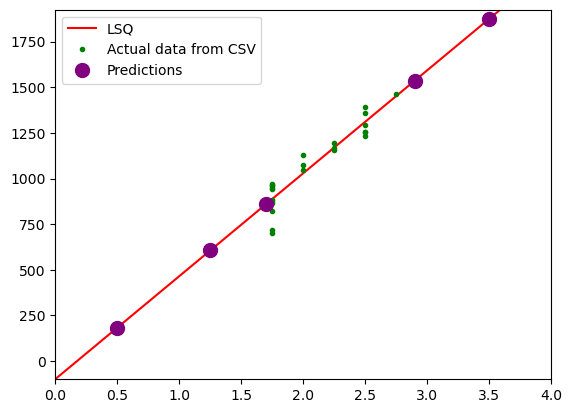

In [24]:
# create a list of test values representing x values that should be fitted to our least squares line
test_vals = [[1,0.5],[1,1.25],[1,1.7],[1,2.9],[1,3.5]]

# get the predictions for our y values
predicted_y = predict(weights,test_vals)

# extract the x values from the test values because we don't need the 1 values from column 0
test_vals_x = column_values(test_vals,1)

# determine the maximum value for the x axis by adding a bit to the maximum x values from our two datasets
x_axis_len = max(max(X[:,1]),max(test_vals_x))+0.5

# same for y but using max on predicted_y returns what we want in the first element of a single element list
y_axis_len = max(max(predicted_y),max(X[:,1]))
y_axis_len = y_axis_len[0] + 50

# calculate an appropriate range for the x axis
ind = np.arange(0, x_axis_len, 0.1)

# plot our line represented by the weights (least squares line)
plt.plot(ind, ind*weights[1]+weights[0],'r',label='LSQ')

# plot the data from our CSV for comparison
plt.plot(X[:,1], y, '.', color='green',label='Actual data from CSV')

# plot our predicted values from our test_vals list. These should fall onto our least squares line
plt.plot(test_vals_x, predicted_y, 'o', markersize=10, color='purple',label='Predictions')

plt.legend()  # Add a legend which will show the labels

# set the limits of our axes so that our data are all visible regardless of our sample distribution
# now I understand why Pep used the _ = in his presentation. It stops the plt.axis function from 
# showing the values of the axes.
_ = plt.axis([0, x_axis_len, -100, y_axis_len])

In [25]:
class LeastSquares:
    """
    The LeastSquares class can be expanded by moving the code from the functions above
    into the public methods below. It's not clear to me how much of this we need to do for this
    task so, due to time constraints, I'm just putting in the skeleton to demonstrate the syntactic
    structure of the class.
    """
    def __init__(self):
        pass

    def fit(self, X: list[list[float]], y: list[list[float]]) -> list[list[float]]:
        return fit(X, y)
    
    def predict(self, weights: list[list[float]], X) -> list:
        return predict(weights, X)
    
    def get_params(self, X: list[list[float]], y: list[list[float]]) -> list[list[float]]:
        return get_params(X, y)
    

#### Validation of our Manual Calculation from above

In [26]:
X = [[1,874],[1,982],[1,1100],[1,1298]]
y = [[14.50],[15.25],[17.00],[16.75]]
XT = transpose_matrix(X)
XTX = dot_product(XT,X)
inv_XTX = inverse_matrix(XTX)
step4 = dot_product(inv_XTX,XT)
final = dot_product(step4,y)

print(XTX)
print(inv_XTX)
print( np.array(step4).round(2))
print(final)


[[4.0, 4254.0], [4254.0, 4623004.0]]
[[11.689011378002528, -0.010756005056890013], [-0.010756005056890013, 1.011378002528445e-05]]
[[ 2.29  1.13 -0.14 -2.27]
 [-0.   -0.    0.    0.  ]]
[[9.87583817951954], [0.0056409608091024036]]


<hr style="border:2px solid gray"> </hr>

## Reflection

This was delightfully challenging but time consuming and it required more effort than I had planned.  I got some feedback on my draft and it influenced my thinking where it was relevant to my approach.

Like etivity 1, this task was about using native python code to do the heavy lifting but two libraries were available and I chose to use them to validate my work by using test cases that apply the same data to my native versions and the NumPy versions and compare the result.  While this took a bit of research into the library I am confident that it will pay dividends as we will make much use of it.  This approach also gave me confidence that my code was an accurate reflection of what was required, at least in terms of the operational functions.

I hardly considered anything other than lists of lists to represent matrices and I learnt a lot about how to specify subsets of those structures where appropriate.  There was plenty of documentation available on the meaning of the main operations (e.g. dot product, inverse) and I found it straightforward to figure out how to implement them in python.  The clues in the Notebook template guided me in determining how to glue together the functions I had developed but I can't say I could derive the Least Squares formula algebraically now.

Looking at the other submissions I don't see examples of how people are going to demonstrate how to reap the benefits of this work.  I have included some new test sample data points and graphed them over the data we were given. This illustrates to me how useful the algorithm will be for prediction.  An example I gave in feedback to a peer was in a scenario where we had data representing the age and weight of an individual.  We can use linear regression to determine the slope and position required to draw a line on a graph that predicts the weight for an unknown individual based on their age.  This work also encouraged me to explore the matplotlib library and I found it easy to customise the markers and axes to suit the application.

I created a structure for a LeastSquares class as requested for inclusion in the reflection.

Pierce showed me a one liner to transpose a matrix that appeared very efficient but not immediately understandable so I did not use it. Jason reminded me to use more meaningful names for functions and variables.  No peer material was used in my code.